Patter Recognition
===
### Dimmensionality Reduction Project - MFeat Pixel Dataset

* **Professor:**  Alexandre L. M. Levada
* **Students:**
  *    Wesley Nogueira Galvão 
*    


In [1]:
%load_ext autoreload
%autoreload 2

# Importing Libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

import os


# Load the dataset
from sklearn.datasets import fetch_openml

import dimensionality_reduction
from utils import plot_embeddings

# MFeat Pixel

https://datahub.io/machine-learning/mfeat-pixel

## EDA

In [21]:
# Carregar o conjunto de dados Mfeat pixel
mfeat_pixel = fetch_openml(name='mfeat-pixel', version=1)

# Obter características e rótulos
features = mfeat_pixel.data
labels = mfeat_pixel.target

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
# Carregar o conjunto de dados Mfeat pixel
mfeat_pixel = fetch_openml(name='mfeat-pixel', version=1)

# Obter características e rótulos
features = mfeat_pixel.data.astype('float')
labels = mfeat_pixel.target.astype('int')

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [16]:
mfeat_pixel.details

{'id': '20',
 'name': 'mfeat-pixel',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': 'Robert P.W. Duin',
 'collection_date': '1998',
 'upload_date': '2014-04-06T23:20:48',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/20/mfeat-pixel.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0020/dataset_20.pq',
 'file_id': '20',
 'default_target_attribute': 'class',
 'version_label': '1',
 'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'tag': ['Images',
  'Machine Learning',
  'OpenML100',
  'study_1',
  'study_123',
  'study_14',
  'study_34',
  'study_37',
  'study_41',
  'study_7',
  'study_70',
  'study_76',
  'uci'],
 'visibility': 'public',
 'original_data_url': 'http://archive.ics.uci.edu/ml/datasets/Multiple+Features',
 'paper_url': 'https://dml.cz/handle/10338.dmlcz/135219',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0020/dataset_20.pq',
 'status': 'active',
 '

In [9]:
# Contar o número de ocorrências de cada label
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{1: 200, 2: 200, 3: 200, 4: 200, 5: 200, 6: 200, 7: 200, 8: 200, 9: 200, 10: 200}


In [19]:
np.max(features)

6.0

In [11]:
features

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att231,att232,att233,att234,att235,att236,att237,att238,att239,att240
0,0.0,3.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,5.0,...,4.0,4.0,4.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,4.0,...,2.0,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,...,1.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,0.0
3,0.0,0.0,3.0,3.0,2.0,2.0,4.0,5.0,6.0,6.0,...,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,6.0,6.0,...,4.0,4.0,4.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,1.0,3.0,4.0,5.0,6.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,3.0,6.0,6.0,6.0,6.0,6.0,...,4.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,2.0,4.0,4.0,4.0,6.0,4.0,4.0,...,0.0,2.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,5.0,...,3.0,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0


In [20]:
features.dtypes

att1      float64
att2      float64
att3      float64
att4      float64
att5      float64
           ...   
att236    float64
att237    float64
att238    float64
att239    float64
att240    float64
Length: 240, dtype: object

# Dimensionality Reduction - Supervised Models

In [5]:
# Define the number of runs
n_runs = 20

In [6]:
# Create an instance of ModelEvaluation for mfeat dataset
dr = dimensionality_reduction.DimensonalityReduction(
    X=features,
    y=labels,
    scaler=True,
    random_state=None,
    test_size=.50
)


# Define models to evaluate
models_to_evaluate = {    
    'Perceptron': [Perceptron(max_iter=2000), 'supervised'],
    'Logistic Regression': [LogisticRegression(max_iter=2000), 'supervised'],
    'MLP': [MLPClassifier(max_iter=2000), 'supervised'],
    'KNN':[KNeighborsClassifier(n_neighbors=7), 'supervised'],
    'Nearest Centroid': [NearestCentroid(), 'supervised'],
    'QDA': [QuadraticDiscriminantAnalysis(), 'supervised'],
    'Linear SVM': [SVC(kernel='linear', max_iter=2000), 'supervised'],
    'RBF SVM': [SVC(kernel='rbf', max_iter=2000), 'supervised'],
    # Add more models to evaluate here
}

### RAW data

In [7]:
%%time
# Evaluate models without dimensionality reduction
mfeat_raw = dr.run_multiple_training(models_to_evaluate, use_reduction=False, n_runs=n_runs)
mfeat_raw.to_csv('results/mfeat/mfeat_raw.csv', index=False)
mfeat_raw


Overall Progress:  12%|█▎        | 1/8 [00:00<00:05,  1.32it/s]

------Nearest Centroid : Runs Progress: 100%|██████████| 20/20 [00:00<00:00, 498.27it/s]
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variable

CPU times: user 1min 18s, sys: 2.99 s, total: 1min 21s
Wall time: 13.1 s


,model,Raw Data avg acc,Raw Data std acc
0,Perceptron,0.92300,0.0000
1,Logistic Regression,0.97200,0.0000
2,MLP,0.97375,0.0027
3,KNN,0.97600,0.0000
4,Nearest Centroid,0.93500,0.0000
5,QDA,0.24100,0.0000
6,Linear SVM,0.97700,0.0000
7,RBF SVM,0.98000,0.0000


### PCA

In [8]:
%%time
mfeat_PCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='PCA', n_runs=n_runs, n_components=20)
mfeat_PCA.to_csv('results/mfeat/mfeat_PCA.csv', index=False)
mfeat_PCA

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  75%|███████▌  | 6/8 [00:09<00:02,  1.06s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-proc

CPU times: user 1min 19s, sys: 3.29 s, total: 1min 23s
Wall time: 10.4 s


,model,PCA avg acc,PCA std acc
0,Perceptron,0.90640,0.0147
1,Logistic Regression,0.96000,0.0000
2,MLP,0.96870,0.0028
3,KNN,0.97205,0.0002
4,Nearest Centroid,0.93300,0.0000
5,QDA,0.97700,0.0000
6,Linear SVM,0.96385,0.0004
7,RBF SVM,0.98000,0.0000


### LDA

In [9]:
%%time
mfeat_LDA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='LDA', n_runs=n_runs, n_components=9)
mfeat_LDA.to_csv('results/mfeat/mfeat_LDA.csv', index=False)
mfeat_LDA

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]

CPU times: user 1min 34s, sys: 4.61 s, total: 1min 38s
Wall time: 12.4 s


,model,LDA avg acc,LDA std acc
0,Perceptron,0.90300,0.0000
1,Logistic Regression,0.93900,0.0000
2,MLP,0.93805,0.0026
3,KNN,0.94200,0.0000
4,Nearest Centroid,0.94000,0.0000
5,QDA,0.94700,0.0000
6,Linear SVM,0.93000,0.0000
7,RBF SVM,0.94700,0.0000


### Kernel PCA

In [10]:
%%time
mfeat_KernelPCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='KernelPCA', n_runs=n_runs, n_components=20)
mfeat_KernelPCA.to_csv('results/mfeat/mfeat_KernelPCA.csv', index=False)
mfeat_KernelPCA

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  75%|███████▌  | 6/8 [00:14<00:04,  2.03s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-proc

CPU times: user 2min 20s, sys: 6.01 s, total: 2min 26s
Wall time: 18.3 s


,model,KernelPCA avg acc,KernelPCA std acc
0,Perceptron,0.9170,0.0000
1,Logistic Regression,0.9600,0.0000
2,MLP,0.9698,0.0029
3,KNN,0.9720,0.0000
4,Nearest Centroid,0.9330,0.0000
5,QDA,0.9770,0.0000
6,Linear SVM,0.9640,0.0000
7,RBF SVM,0.9800,0.0000


### ISOMAP

In [11]:
%%time
mfeat_Isomap = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Isomap', n_runs=n_runs, n_components=20)
mfeat_Isomap.to_csv('results/mfeat/mfeat_Isomap.csv', index=False)
mfeat_Isomap

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  12%|█▎        | 1/8 [00:05<00:39,  5.60s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the document

CPU times: user 7min 9s, sys: 20.2 s, total: 7min 29s
Wall time: 57.8 s


,model,Isomap avg acc,Isomap std acc
0,Perceptron,0.83300,0.0000
1,Logistic Regression,0.95300,0.0000
2,MLP,0.96045,0.0039
3,KNN,0.96700,0.0000
4,Nearest Centroid,0.96200,0.0000
5,QDA,0.95600,0.0000
6,Linear SVM,0.96300,0.0000
7,RBF SVM,0.96900,0.0000


### LLE

In [12]:
%%time
mfeat_LocalLinearEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Localembed', n_runs=n_runs, n_components=20)
mfeat_LocalLinearEmbedding.to_csv('results/mfeat/mfeat_LocalLinearEmbedding.csv', index=False)
mfeat_LocalLinearEmbedding

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  62%|██████▎   | 5/8 [00:35<00:19,  6.60s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings

CPU times: user 5min 55s, sys: 14.6 s, total: 6min 10s
Wall time: 46.4 s


,model,Localembed avg acc,Localembed std acc
0,Perceptron,0.8280,0.0000
1,Logistic Regression,0.9610,0.0000
2,MLP,0.9721,0.0006
3,KNN,0.9700,0.0000
4,Nearest Centroid,0.9660,0.0000
5,QDA,0.9500,0.0000
6,Linear SVM,0.9620,0.0000
7,RBF SVM,0.9740,0.0000


### Spectral Embedding

In [13]:
%%time
mfeat_SpectralEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='SpectEmbed', n_runs=n_runs, n_components=20)
mfeat_SpectralEmbedding.to_csv('results/mfeat/mfeat_SpectralEmbedding.csv', index=False)
mfeat_SpectralEmbedding

Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  25%|██▌       | 2/8 [00:09<00:28,  4.82s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
Overall Progress:  62%|██████▎   | 5/8 [01:17<00:42, 14.17s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anacond

CPU times: user 11min 46s, sys: 32.5 s, total: 12min 18s
Wall time: 1min 32s


,model,SpectEmbed avg acc,SpectEmbed std acc
0,Perceptron,0.2100,0.0000
1,Logistic Regression,0.0890,0.0000
2,MLP,0.3522,0.0119
3,KNN,0.3970,0.0000
4,Nearest Centroid,0.4250,0.0000
5,QDA,0.1020,0.0000
6,Linear SVM,0.0890,0.0000
7,RBF SVM,0.3690,0.0000


### TSNE

In [14]:
%%time
mfeat_Tsne = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Tsne', n_runs=n_runs, n_components=3)
mfeat_Tsne.to_csv('results/mfeat/mfeat_Tsne.csv', index=False)
mfeat_Tsne


Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress:  75%|███████▌  | 6/8 [07:31<02:27, 73.62s/it]/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-proc

CPU times: user 1h 17min 14s, sys: 1min 46s, total: 1h 19min 1s
Wall time: 9min 53s


,model,Tsne avg acc,Tsne std acc
0,Perceptron,0.21750,0.0720
1,Logistic Regression,0.32595,0.0104
2,MLP,0.27755,0.0126
3,KNN,0.35920,0.0092
4,Nearest Centroid,0.38985,0.0119
5,QDA,0.28795,0.0094
6,Linear SVM,0.35240,0.0096
7,RBF SVM,0.31815,0.0140


## Data summarizing

In [15]:

# Set model as index
mfeat_raw.set_index('model', inplace=True)
mfeat_PCA.set_index('model', inplace=True)
mfeat_LDA.set_index('model', inplace=True)
mfeat_KernelPCA.set_index('model', inplace=True)
mfeat_Isomap.set_index('model', inplace=True)
mfeat_LocalLinearEmbedding.set_index('model', inplace=True)
mfeat_SpectralEmbedding.set_index('model', inplace=True)
mfeat_Tsne.set_index('model', inplace=True)

In [16]:
all_results = pd.concat([mfeat_raw, mfeat_PCA, mfeat_LDA, mfeat_KernelPCA, mfeat_Isomap, mfeat_LocalLinearEmbedding, mfeat_SpectralEmbedding, mfeat_Tsne], axis=1)
all_results.to_csv('results/mfeat/all_mfeat_supervised.csv')

In [17]:
# Select columns which contain the word avg
all_mfeat_avg_acc = all_results.filter(like='avg')
all_mfeat_avg_acc.to_csv('results/mfeat/all_mfeat_supervised_avg_acc.csv')
all_mfeat_avg_acc


,Raw Data avg acc,PCA avg acc,LDA avg acc,KernelPCA avg acc,Isomap avg acc,Localembed avg acc,SpectEmbed avg acc,Tsne avg acc
model,,,,,,,,
Perceptron,0.92300,0.90640,0.90300,0.9170,0.83300,0.8280,0.2100,0.21750
Logistic Regression,0.97200,0.96000,0.93900,0.9600,0.95300,0.9610,0.0890,0.32595
MLP,0.97375,0.96870,0.93805,0.9698,0.96045,0.9721,0.3522,0.27755
KNN,0.97600,0.97205,0.94200,0.9720,0.96700,0.9700,0.3970,0.35920
Nearest Centroid,0.93500,0.93300,0.94000,0.9330,0.96200,0.9660,0.4250,0.38985
QDA,0.24100,0.97700,0.94700,0.9770,0.95600,0.9500,0.1020,0.28795
Linear SVM,0.97700,0.96385,0.93000,0.9640,0.96300,0.9620,0.0890,0.35240
RBF SVM,0.98000,0.98000,0.94700,0.9800,0.96900,0.9740,0.3690,0.31815


In [18]:
all_mfeat_avg_acc = pd.read_csv('results/mfeat/all_mfeat_supervised_avg_acc.csv')
all_mfeat_avg_acc

,model,Raw Data avg acc,PCA avg acc,LDA avg acc,KernelPCA avg acc,Isomap avg acc,Localembed avg acc,SpectEmbed avg acc,Tsne avg acc
0,Perceptron,0.92300,0.90640,0.90300,0.9170,0.83300,0.8280,0.2100,0.21750
1,Logistic Regression,0.97200,0.96000,0.93900,0.9600,0.95300,0.9610,0.0890,0.32595
2,MLP,0.97375,0.96870,0.93805,0.9698,0.96045,0.9721,0.3522,0.27755
3,KNN,0.97600,0.97205,0.94200,0.9720,0.96700,0.9700,0.3970,0.35920
4,Nearest Centroid,0.93500,0.93300,0.94000,0.9330,0.96200,0.9660,0.4250,0.38985
5,QDA,0.24100,0.97700,0.94700,0.9770,0.95600,0.9500,0.1020,0.28795
6,Linear SVM,0.97700,0.96385,0.93000,0.9640,0.96300,0.9620,0.0890,0.35240
7,RBF SVM,0.98000,0.98000,0.94700,0.9800,0.96900,0.9740,0.3690,0.31815


In [19]:
all_mfeat_avg_acc.describe()

,Raw Data avg acc,PCA avg acc,LDA avg acc,KernelPCA avg acc,Isomap avg acc,Localembed avg acc,SpectEmbed avg acc,Tsne avg acc
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.872219,0.957625,0.935756,0.959100,0.945431,0.947887,0.254150,0.316069
std,0.255954,0.025303,0.014301,0.022414,0.045731,0.049039,0.147381,0.054401
min,0.241000,0.906400,0.903000,0.917000,0.833000,0.828000,0.089000,0.217500
25%,0.932000,0.953250,0.936038,0.953250,0.955250,0.958250,0.098750,0.285350
50%,0.972875,0.966275,0.939500,0.966900,0.961225,0.964000,0.281100,0.322050
75%,0.976250,0.973287,0.943250,0.973250,0.964000,0.970525,0.376000,0.354100
max,0.980000,0.980000,0.947000,0.980000,0.969000,0.974000,0.425000,0.389850


# Dimensionality Reduction - Unsupervised Models

In [20]:
# Carregar o conjunto de dados Mfeat pixel
mfeat_pixel = fetch_openml(name='mfeat-pixel', version=1)

# Obter características e rótulos
features = mfeat_pixel.data.astype('float')
labels = mfeat_pixel.target.astype('int')

# Create an instance of ModelEvaluation for mfeat dataset
dr = dimensionality_reduction.DimensonalityReduction(
    X=features,
    y=labels,
    scaler=True,
    random_state=None,
    split_data=False
)

# Define models to evaluate
models_to_evaluate = {
    'KMeans': [KMeans(n_clusters=10, n_init=10), 'unsupervised'],
    'GMM': [GaussianMixture(n_components=10, covariance_type='full'), 'unsupervised'],
    # Add more models to evaluate here
}

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### RAW data

In [21]:
%%time
# Evaluate models without dimensionality reduction
mfeat_raw = dr.run_multiple_training(models_to_evaluate, use_reduction=False, n_runs=int(n_runs))
mfeat_raw.to_csv('results/mfeat/mfeat_raw_unsupervised.csv', index=False)
mfeat_raw


Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:04<00:00,  2.44s/it]

CPU times: user 37.6 s, sys: 1.3 s, total: 38.9 s
Wall time: 4.89 s


,model,Raw Data avg rand_score,Raw Data std rand_score
0,KMeans,0.643448,0.0418
1,GMM,0.599969,0.0794


### PCA

In [22]:
%%time
mfeat_PCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='PCA', n_runs=n_runs, n_components=20)
mfeat_PCA.to_csv('results/mfeat/mfeat_PCA_unsupervised.csv', index=False)
mfeat_PCA

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

CPU times: user 21.9 s, sys: 877 ms, total: 22.8 s
Wall time: 2.87 s


,model,PCA avg rand_score,PCA std rand_score
0,KMeans,0.609021,0.0501
1,GMM,0.650748,0.0570


### LDA

In [23]:
%%time
mfeat_LDA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='LDA', n_runs=n_runs, n_components=8)
mfeat_LDA.to_csv('results/mfeat/mfeat_LDA_unsupervised.csv', index=False)
mfeat_LDA

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

CPU times: user 14.6 s, sys: 730 ms, total: 15.4 s
Wall time: 1.93 s


,model,LDA avg rand_score,LDA std rand_score
0,KMeans,0.952745,0.0002
1,GMM,0.909870,0.0547


### Kernel PCA

In [24]:
%%time
mfeat_KernelPCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='KernelPCA', n_runs=n_runs, n_components=20)
mfeat_KernelPCA.to_csv('results/mfeat/mfeat_KernelPCA_unsupervised.csv', index=False)
mfeat_KernelPCA

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:11<00:00,  5.81s/it]

CPU times: user 1min 29s, sys: 3.07 s, total: 1min 32s
Wall time: 11.6 s


,model,KernelPCA avg rand_score,KernelPCA std rand_score
0,KMeans,0.646372,0.0319
1,GMM,0.689007,0.0741


### Isomap

In [25]:
%%time
mfeat_Isomap = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Isomap', n_runs=n_runs, n_components=20)
mfeat_Isomap.to_csv('results/mfeat/mfeat_Isomap_unsupervised.csv', index=False)
mfeat_Isomap

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:47<00:00, 23.83s/it]

CPU times: user 3min 2s, sys: 6.4 s, total: 3min 9s
Wall time: 47.7 s


,model,Isomap avg rand_score,Isomap std rand_score
0,KMeans,0.854290,0.0239
1,GMM,0.777134,0.0510


### LLE

In [26]:
%%time
mfeat_LocalLinearEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Localembed', n_runs=n_runs, n_components=20)
mfeat_LocalLinearEmbedding.to_csv('results/mfeat/mfeat_LocalLinearEmbedding_unsupervised.csv', index=False)
mfeat_LocalLinearEmbedding

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:16<00:00,  8.08s/it]

CPU times: user 2min 5s, sys: 3.46 s, total: 2min 9s
Wall time: 16.2 s


,model,Localembed avg rand_score,Localembed std rand_score
0,KMeans,0.723491,0.0667
1,GMM,0.795202,0.0465


### Spectral Embedding

In [27]:
%%time
mfeat_SpectralEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='SpectEmbed', n_runs=n_runs, n_components=20)
mfeat_SpectralEmbedding.to_csv('results/mfeat/mfeat_SpectralEmbedding_unsupervised.csv', index=False)
mfeat_SpectralEmbedding

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [00:48<00:00, 24.18s/it]

CPU times: user 3min 6s, sys: 8.09 s, total: 3min 14s
Wall time: 48.4 s


,model,SpectEmbed avg rand_score,SpectEmbed std rand_score
0,KMeans,0.635558,0.0592
1,GMM,0.613622,0.0422


### TSNE

In [28]:
%%time
mfeat_Tsne = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Tsne', n_runs=n_runs, n_components=3)
mfeat_Tsne.to_csv('results/mfeat/mfeat_Tsne_unsupervised.csv', index=False)
mfeat_Tsne


Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 2/2 [04:44<00:00, 142.03s/it]

CPU times: user 36min 59s, sys: 51.7 s, total: 37min 51s
Wall time: 4min 44s


,model,Tsne avg rand_score,Tsne std rand_score
0,KMeans,0.902820,0.0049
1,GMM,0.872017,0.0580


## Data summarizing

In [29]:

# Set model as index
mfeat_raw.set_index('model', inplace=True)
mfeat_PCA.set_index('model', inplace=True)
mfeat_LDA.set_index('model', inplace=True)
mfeat_KernelPCA.set_index('model', inplace=True)
mfeat_Isomap.set_index('model', inplace=True)
mfeat_LocalLinearEmbedding.set_index('model', inplace=True)
mfeat_SpectralEmbedding.set_index('model', inplace=True)
mfeat_Tsne.set_index('model', inplace=True)

In [30]:
all_results = pd.concat(
    [
        mfeat_raw,
        mfeat_PCA,
        mfeat_LDA,
        mfeat_KernelPCA,
        mfeat_Isomap,
        mfeat_LocalLinearEmbedding,
        mfeat_SpectralEmbedding,
        mfeat_Tsne
    ],
    axis=1
)
all_results.to_csv('results/mfeat/all_mfeat_unsupervised.csv')

In [31]:
# Select columns which contain the word avg
all_mfeat_avg_rand = all_results.filter(like='avg')
all_mfeat_avg_rand.to_csv('results/mfeat/all_mfeat_unsupervised_avg_rand.csv')
all_mfeat_avg_rand


,Raw Data avg rand_score,PCA avg rand_score,LDA avg rand_score,KernelPCA avg rand_score,Isomap avg rand_score,Localembed avg rand_score,SpectEmbed avg rand_score,Tsne avg rand_score
model,,,,,,,,
KMeans,0.643448,0.609021,0.952745,0.646372,0.854290,0.723491,0.635558,0.902820
GMM,0.599969,0.650748,0.909870,0.689007,0.777134,0.795202,0.613622,0.872017


In [32]:
all_mfeat_avg_rand = pd.read_csv('results/mfeat/all_mfeat_unsupervised_avg_rand.csv')
all_mfeat_avg_rand

,model,Raw Data avg rand_score,PCA avg rand_score,LDA avg rand_score,KernelPCA avg rand_score,Isomap avg rand_score,Localembed avg rand_score,SpectEmbed avg rand_score,Tsne avg rand_score
0,KMeans,0.643448,0.609021,0.952745,0.646372,0.854290,0.723491,0.635558,0.902820
1,GMM,0.599969,0.650748,0.909870,0.689007,0.777134,0.795202,0.613622,0.872017


In [33]:
all_mfeat_avg_rand.describe()

,Raw Data avg rand_score,PCA avg rand_score,LDA avg rand_score,KernelPCA avg rand_score,Isomap avg rand_score,Localembed avg rand_score,SpectEmbed avg rand_score,Tsne avg rand_score
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.621708,0.629885,0.931308,0.667689,0.815712,0.759346,0.624590,0.887418
std,0.030745,0.029506,0.030317,0.030147,0.054558,0.050707,0.015511,0.021781
min,0.599969,0.609021,0.909870,0.646372,0.777134,0.723491,0.613622,0.872017
25%,0.610838,0.619453,0.920589,0.657031,0.796423,0.741419,0.619106,0.879718
50%,0.621708,0.629885,0.931308,0.667689,0.815712,0.759346,0.624590,0.887418
75%,0.632578,0.640316,0.942026,0.678348,0.835001,0.777274,0.630074,0.895119
max,0.643448,0.650748,0.952745,0.689007,0.854290,0.795202,0.635558,0.902820


In [34]:
all_mfeat_avg_rand.describe().loc['mean'].sort_values(ascending=False)

LDA avg rand_score           0.931308
Tsne avg rand_score          0.887418
Isomap avg rand_score        0.815712
Localembed avg rand_score    0.759346
KernelPCA avg rand_score     0.667689
PCA avg rand_score           0.629885
SpectEmbed avg rand_score    0.624590
Raw Data avg rand_score      0.621708
Name: mean, dtype: float64

# Visualizing clusters in 2D

Here we will select the best two dimensionality reduction models and visualize the clusters in 2D.

## Ranking of dimensionality reduction methods with supervised models classifiers

In [35]:
# Sort by mean accuracy
all_mfeat_avg_acc.describe().loc['mean'].sort_values(ascending=False)

KernelPCA avg acc     0.959100
PCA avg acc           0.957625
Localembed avg acc    0.947887
Isomap avg acc        0.945431
LDA avg acc           0.935756
Raw Data avg acc      0.872219
Tsne avg acc          0.316069
SpectEmbed avg acc    0.254150
Name: mean, dtype: float64

## Ranking of dimensionality reduction methods with unsupervised models classifiers

In [36]:
all_mfeat_avg_rand.describe().loc['mean'].sort_values(ascending=False)

LDA avg rand_score           0.931308
Tsne avg rand_score          0.887418
Isomap avg rand_score        0.815712
Localembed avg rand_score    0.759346
KernelPCA avg rand_score     0.667689
PCA avg rand_score           0.629885
SpectEmbed avg rand_score    0.624590
Raw Data avg rand_score      0.621708
Name: mean, dtype: float64

  
Now, we will reduce the raw data to two components and visualize the clusters in 2D, colorizing each cloud of points according to the labels.

In [3]:
mfeat_pixel = fetch_openml(name='mfeat-pixel', version=1)
features = mfeat_pixel.data.astype('float')
labels = mfeat_pixel.target.astype('int')

dr = dimensionality_reduction.DimensonalityReduction(
    X=features,
    y=labels,
    scaler=True,
    random_state=None,
    split_data=False
)

X_reduced_PCA, _ = dr.apply_PCA(n_components=2)
X_reduced_KPCA, _ = dr.apply_KernelPCA(n_components=2)
X_reduced_LDA, _ = dr.apply_LDA(n_components=2)
X_reduced_Isomap, _ = dr.apply_Isomap(n_components=2)
X_reduced_LLE, _ = dr.apply_Localembed(n_components=2)
X_reduced_SE, _ = dr.apply_SpectEmbed(n_components=2)
X_reduced_Tsne, _ = dr.apply_Tsne(n_components=2)


print("Features dataset shape before reduction:", X_reduced_PCA.shape)

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Features dataset shape before reduction: (2000, 2)


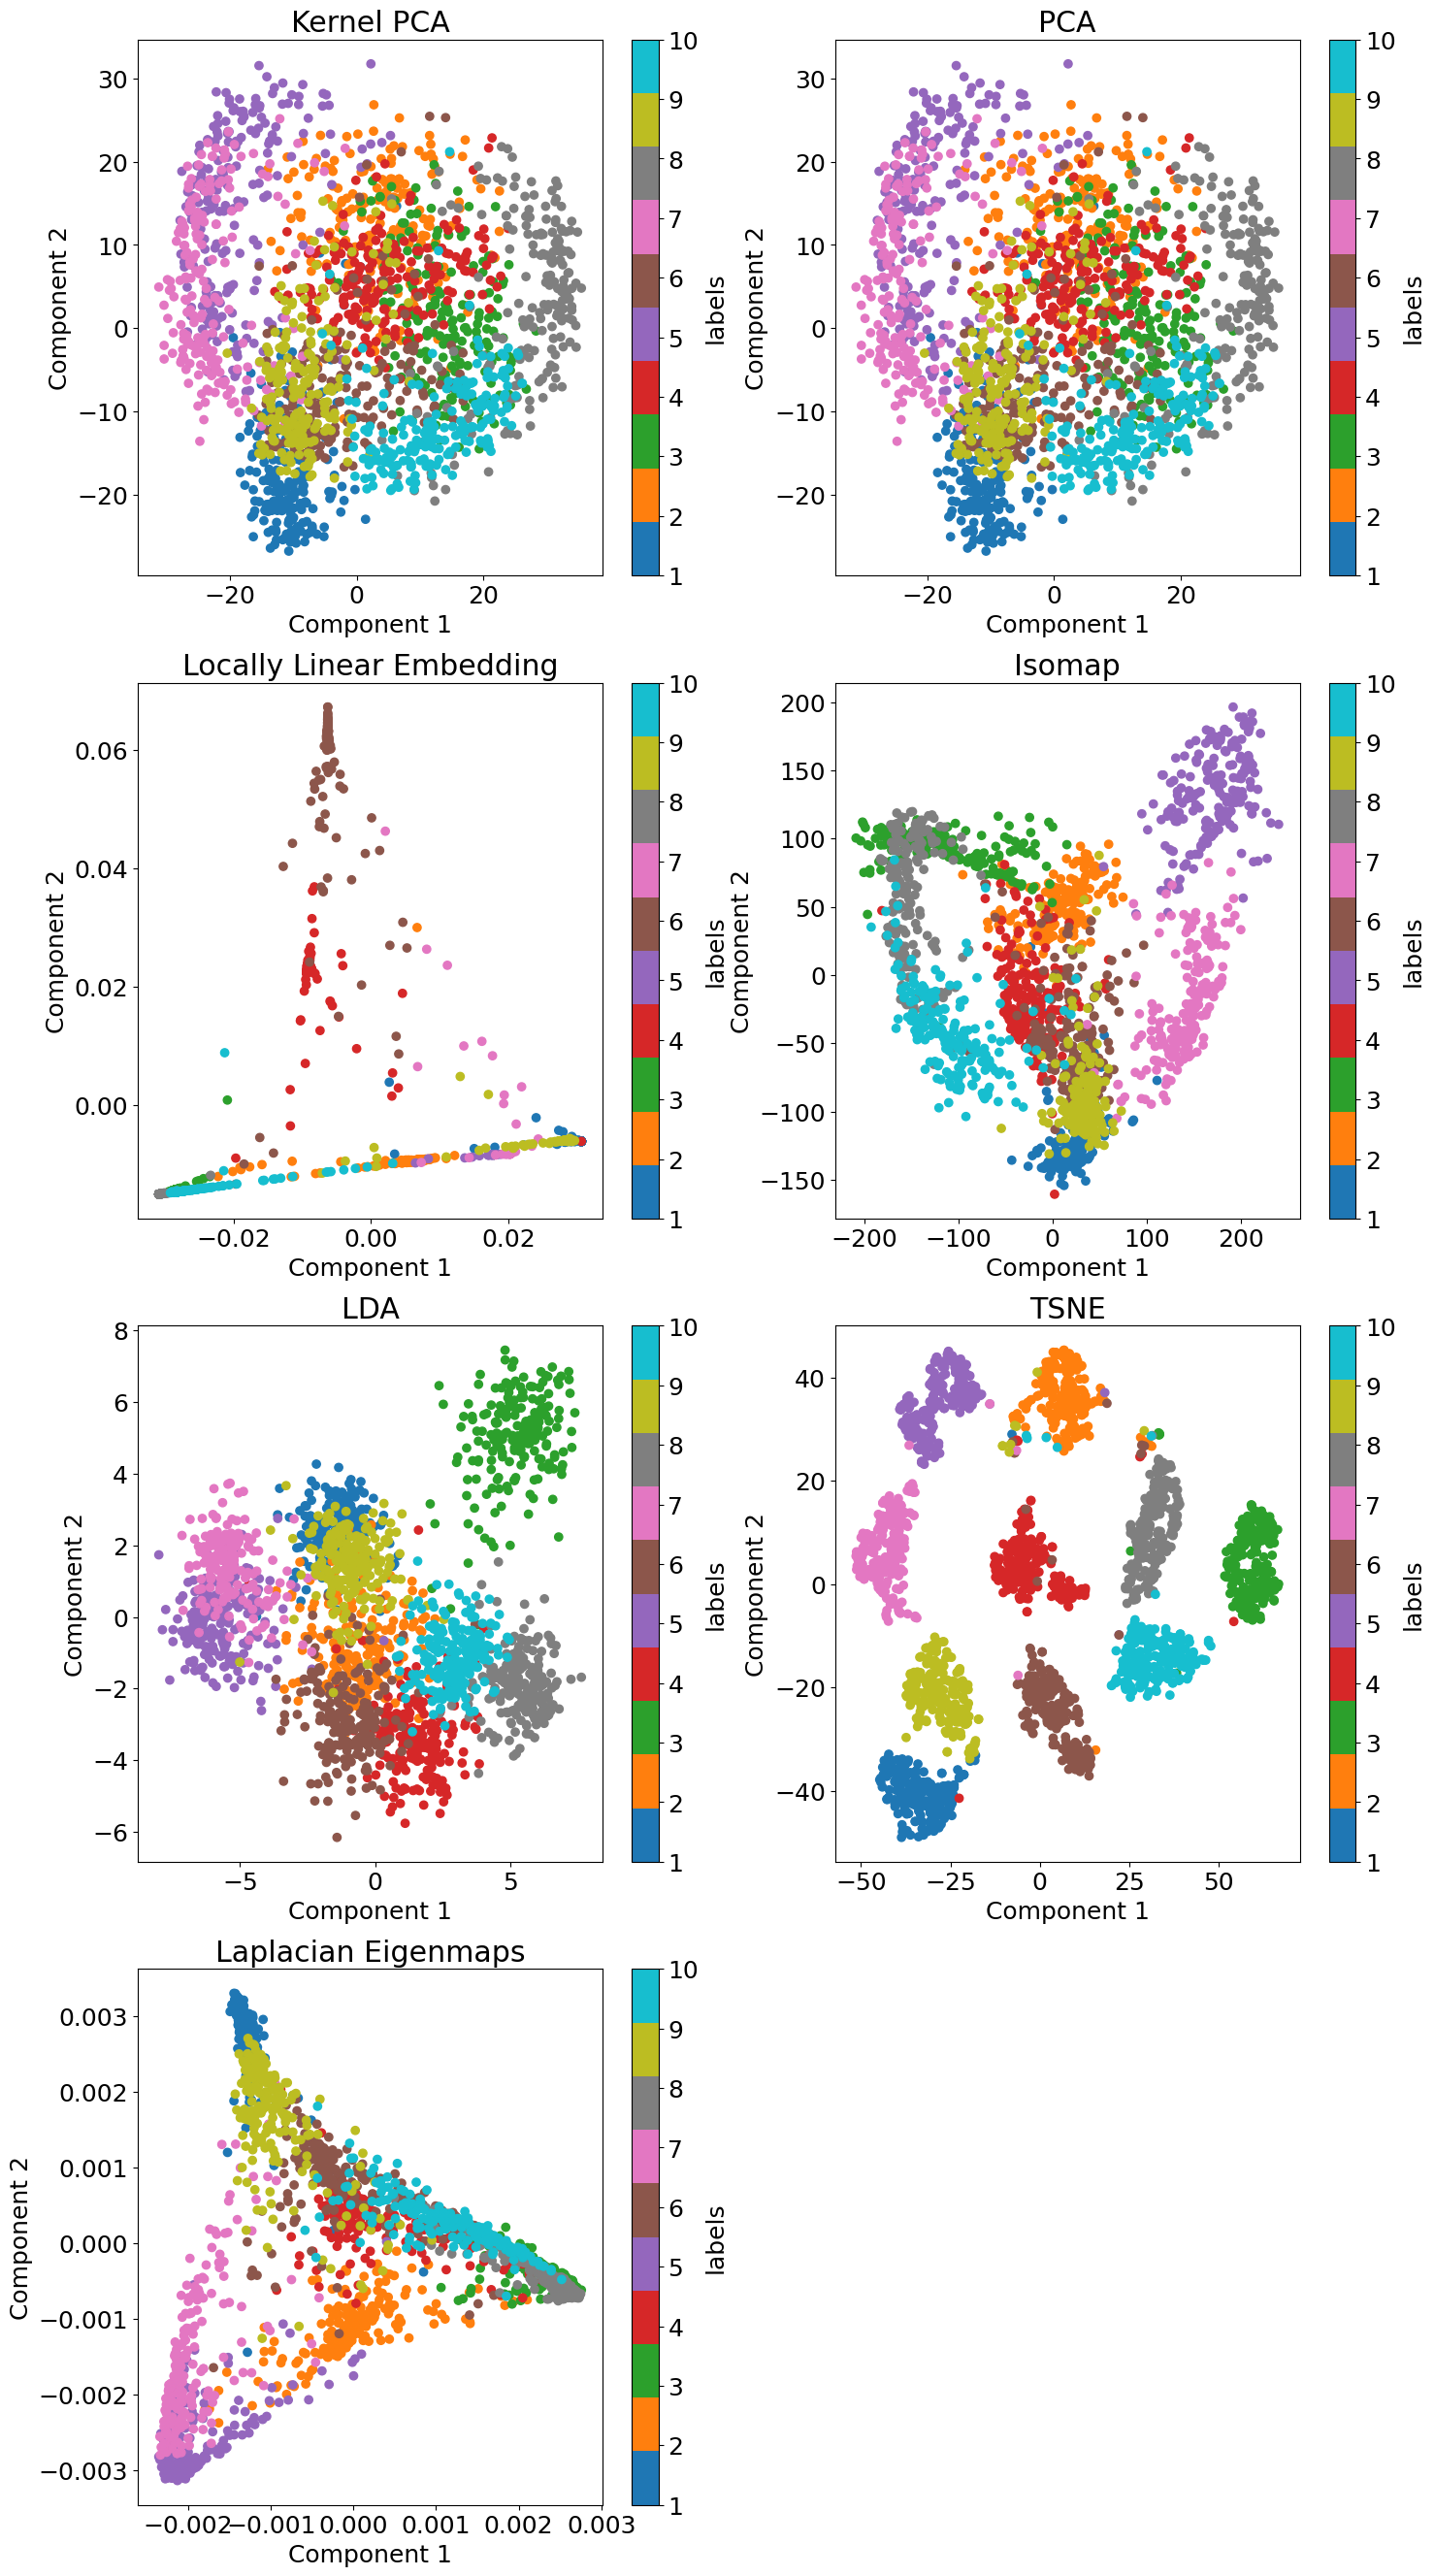

In [6]:
titles = ['Kernel PCA', 'PCA','Locally Linear Embedding', 'Isomap', 'LDA',  'TSNE', 'Laplacian Eigenmaps']
datasets = [X_reduced_KPCA, X_reduced_PCA, X_reduced_LLE, X_reduced_Isomap, X_reduced_LDA, X_reduced_Tsne, X_reduced_SE]
labels_ = [labels, labels, labels, labels, labels, labels, labels]

plot_embeddings(
    datasets,
    labels_,
    titles,
    figsize=(17,33),
    ncols=2,
    dpi=100,
    save_as='results/mfeat/reduced_mfeat_2D_all_methods.png'
)